<a href="https://colab.research.google.com/github/Shaik-pardi-11/-Decision-Trees-and-Random-Forests/blob/main/%20Decision%20Trees%20and%20Random%20Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Random Forests

# 1.Train a Decision Tree Classifier and visualize the tree.

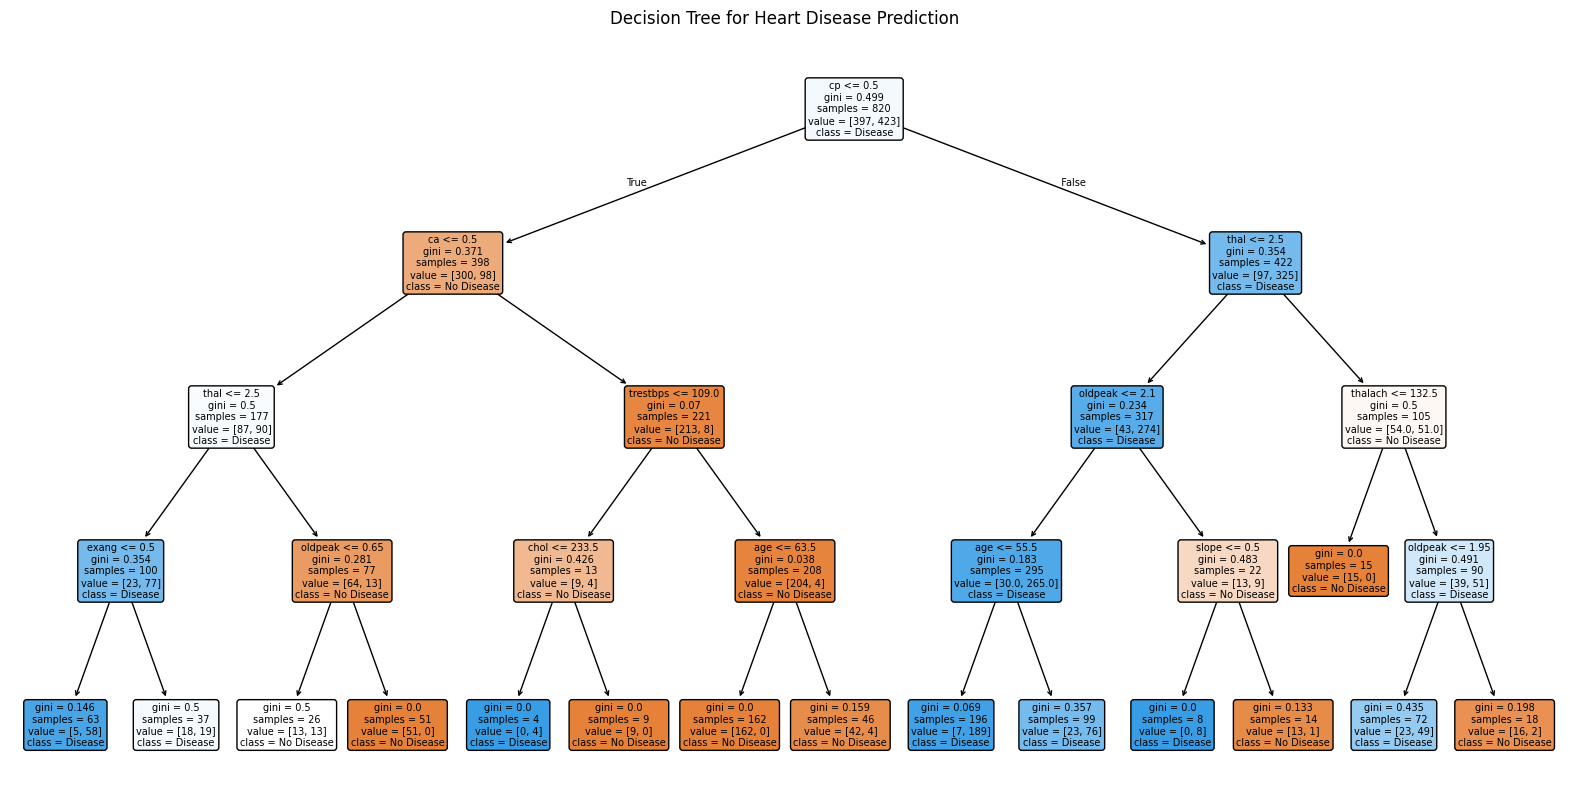

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True)
plt.title("Decision Tree for Heart Disease Prediction")
plt.show()

#  2.Analyze overfitting and control tree depth.

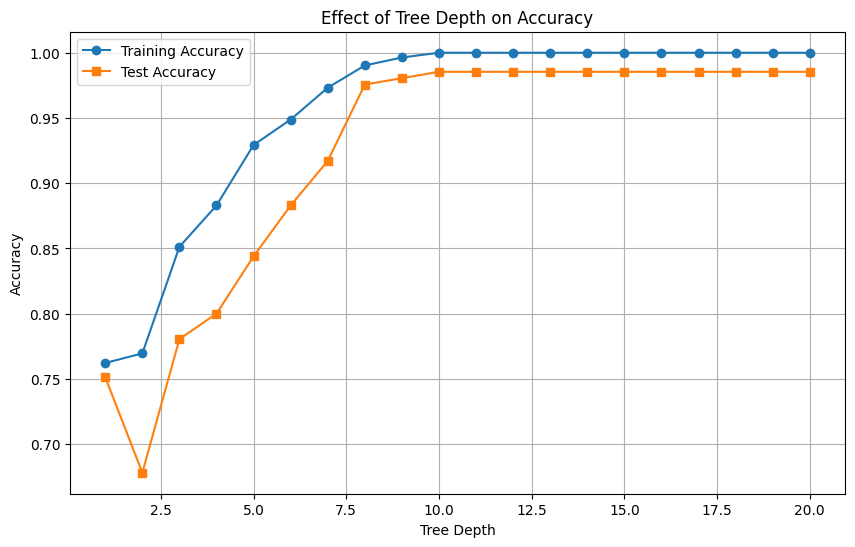

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

#  3.Train a Random Forest and compare accuracy.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)
rf_train_acc = accuracy_score(y_train, rf_clf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"Random Forest - Training Accuracy: {rf_train_acc:.3f}")
print(f"Random Forest - Test Accuracy: {rf_test_acc:.3f}")

Random Forest - Training Accuracy: 0.954
Random Forest - Test Accuracy: 0.873


In [9]:
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

dt_train_acc = accuracy_score(y_train, dt_clf.predict(X_train))
dt_test_acc = accuracy_score(y_test, dt_clf.predict(X_test))

print(f"Decision Tree - Training Accuracy: {dt_train_acc:.3f}")
print(f"Decision Tree - Test Accuracy: {dt_test_acc:.3f}")

Decision Tree - Training Accuracy: 0.929
Decision Tree - Test Accuracy: 0.844


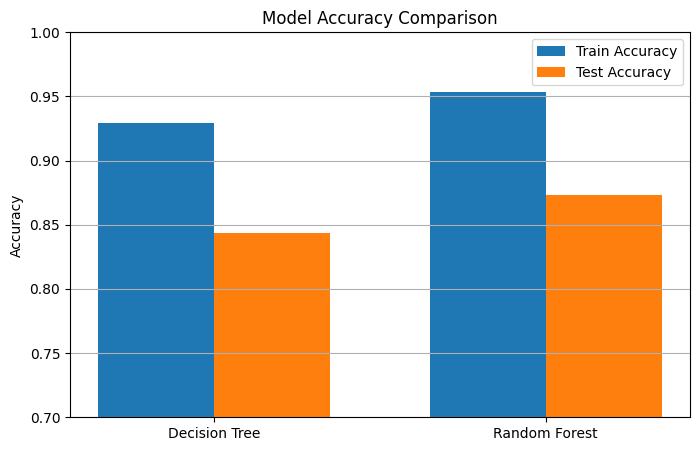

In [10]:
import numpy as np

models = ['Decision Tree', 'Random Forest']
train_scores = [dt_train_acc, rf_train_acc]
test_scores = [dt_test_acc, rf_test_acc]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train Accuracy')
plt.bar(x + width/2, test_scores, width, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, models)
plt.ylim(0.7, 1.0)
plt.legend()
plt.grid(True, axis='y')
plt.show()

# 4.Interpret feature importances.

In [11]:
import pandas as pd
import numpy as np


importances = rf_clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

     Feature  Importance
2         cp    0.164461
12      thal    0.147281
11        ca    0.146191
9    oldpeak    0.129869
7    thalach    0.111845
8      exang    0.069197
0        age    0.057617
10     slope    0.049458
4       chol    0.043644
3   trestbps    0.042909


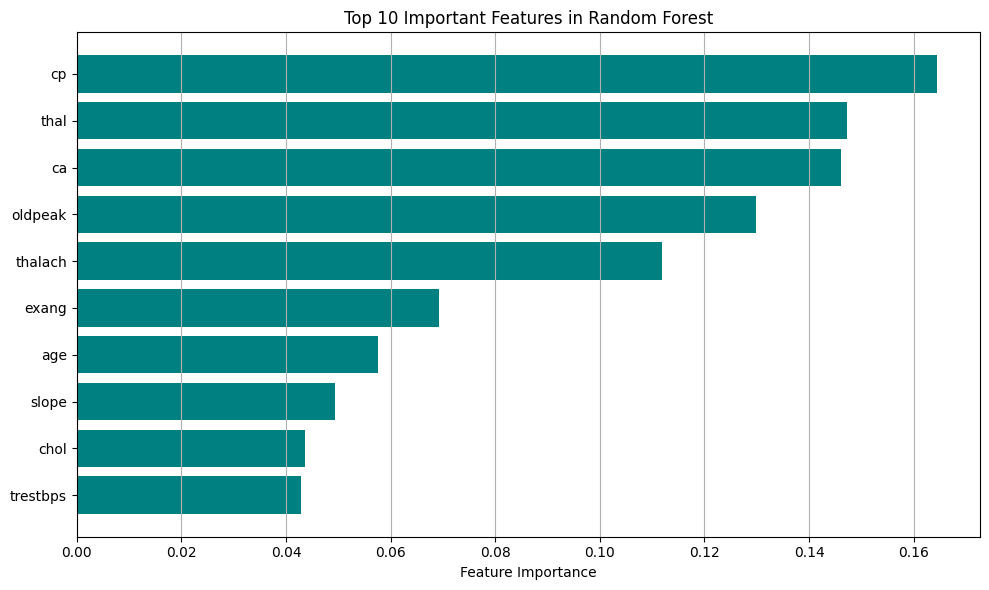

In [12]:
import matplotlib.pyplot as plt

top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n][::-1], importance_df['Importance'][:top_n][::-1], color='teal')
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features in Random Forest")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

#  5.Evaluate using cross-validation.

In [17]:
from sklearn.model_selection import cross_val_score

# Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')

print(f"Decision Tree - Mean Accuracy: {dt_scores.mean():.3f} ± {dt_scores.std():.3f}")
print(f"Random Forest - Mean Accuracy: {rf_scores.mean():.3f} ± {rf_scores.std():.3f}")

Decision Tree - Mean Accuracy: 0.891 ± 0.023
Random Forest - Mean Accuracy: 0.930 ± 0.026


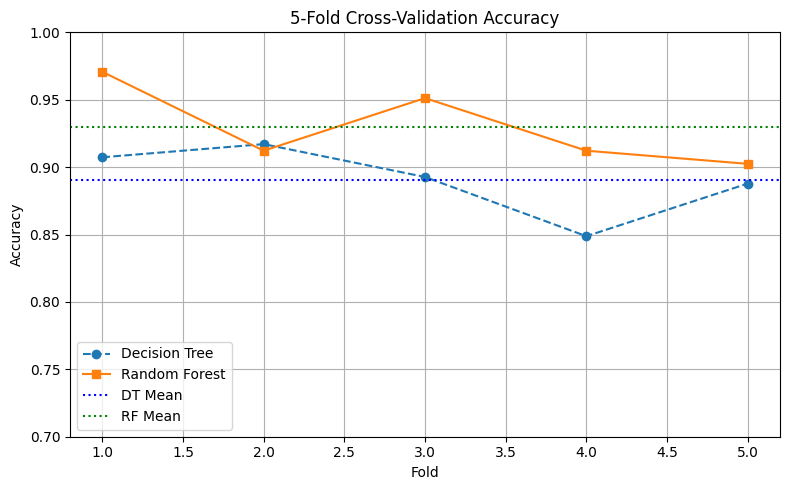

In [18]:
import matplotlib.pyplot as plt
folds = range(1, len(dt_scores) + 1)

plt.figure(figsize=(8, 5))
plt.plot(folds, dt_scores, marker='o', label='Decision Tree', linestyle='--')
plt.plot(folds, rf_scores, marker='s', label='Random Forest', linestyle='-')
plt.axhline(y=dt_scores.mean(), color='blue', linestyle=':', label='DT Mean')
plt.axhline(y=rf_scores.mean(), color='green', linestyle=':', label='RF Mean')
plt.title("5-Fold Cross-Validation Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()